## Descriptive Analytics

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_da/refs/heads/main/data/merged/merged_df.csv')
df

C:\Users\mthig\AppData\Local\Temp\ipykernel_5316\3659583692.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_da/refs/heads/main/data/merged/merged_df.csv')


airline source_city destination_city departure_time  \
0               IndiGo    Banglore            Delhi        Evening   
1             AirIndia     Kolkata         Banglore  Early_Morning   
2          Jet Airways       Delhi           Cochin        Morning   
3               IndiGo     Kolkata         Banglore        Evening   
4       Unkown Airline    Banglore            Delhi      Afternoon   
...                ...         ...              ...            ...   
311899         Vistara     Chennai        Hyderabad        Morning   
311900         Vistara     Chennai        Hyderabad      Afternoon   
311901         Vistara     Chennai        Hyderabad  Early_Morning   
311902         Vistara     Chennai        Hyderabad  Early_Morning   
311903         Vistara     Chennai        Hyderabad        Morning   

         arrival_time  duration specific_stops add_info  price    Sourke  \
0       Early_Morning      2.50       non-stop  No info   3897  Banglore   
1           Afternoon      7.25        2 stops  No info   7662   Kolkata   
2       Early_Morning     19.00        2 stops  No info  13882     Delhi   
3             Evening      5.25       non-stop  No info   6218   Kolkata   
4             Evening      4.45         1 stop  No info  13302  Banglore   
...               ...       ...            ...      ...    ...       ...   
311899        Evening     10.08         1 stop  No info  69265       NaN   
311900          Night     10.42         1 stop  No info  77105       NaN   
311901          Night     13.83         1 stop  No info  79099       NaN   
311902        Evening     10.00         1 stop  No info  81585       NaN   
311903        Evening     10.08         1 stop  No info  81585       NaN   

       general_stops     class  
0               zero   No info  
1        two_or_more   No info  
2        two_or_more   No info  
3               zero   No info  
4                one   No info  
...              ...       ...  
311899           one  Business  
311900           one  Business  
311901           one  Business  
311902           one  Business  
311903           one  Business  

[311904 rows x 12 columns]

### Summary Statistics

In [5]:
from scipy import stats

# Function to calculate mean, median, mode, and standard deviation
def calculate_statistics(df, group_by_col, target_col):
    grouped = df.groupby(group_by_col)[target_col]
    summary = pd.DataFrame({
        'Mean': grouped.mean(),
        'Median': grouped.median(),
        'Mode': grouped.apply(lambda x: stats.mode(x, keepdims=True)[0][0]),
        'Std Dev': grouped.std()
    })
    return summary

# Calculate statistics for 'duration' and 'price' grouped by 'airline'
duration_stats = calculate_statistics(df, 'airline', 'duration')
price_stats = calculate_statistics(df, 'airline', 'price')

# Filter out 'Trujet' from the results
duration_stats = duration_stats[duration_stats.index != 'Trujet']
price_stats = price_stats[price_stats.index != 'Trujet']

# Output the results
print("Duration Statistics:")
print(duration_stats)

print("\nPrice Statistics:")
print(price_stats)



Duration Statistics:
                                        Mean  Median   Mode   Std Dev
airline                                                              
AirAsia                             8.880398   9.250  10.92  4.204188
AirIndia                           15.507119  15.000   2.25  7.674291
GO_FIRST                            8.755380   8.830   2.17  4.015146
GoAir                               4.701042   5.100   2.55  2.345375
IndiGo                              5.739896   5.920   2.25  2.829687
Jet Airways                        14.041198  13.200   3.00  8.482636
Multiple carriers                  10.348427  10.225  10.30  2.623755
Multiple carriers Premium economy   9.835714   9.750   6.35  2.880867
SpiceJet                           11.771293  10.750   2.75  8.978142
Unkown Airline                     10.597092   8.400   2.50  8.456157
Vistara                            13.314106  12.500   2.17  6.792247
Vistara Premium economy             2.333333   2.350   2.15  0.175594

In [6]:
# Function to generate frequency distributions
def generate_frequency_distribution(df, column):
    frequency_distribution = df[column].value_counts()
    percentage_distribution = df[column].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'Frequency': frequency_distribution,
        'Percentage': percentage_distribution
    })

# Generate frequency distributions for relevant categorical columns
columns_to_analyze = ['airline', 'source_city', 'destination_city', 'general_stops']
for col in columns_to_analyze:
    print(f"Frequency Distribution for {col}:")
    print(generate_frequency_distribution(df, col))
    print("\n")


Frequency Distribution for airline:
                                   Frequency  Percentage
airline                                                 
Vistara                               128343   41.148238
AirIndia                               82635   26.493729
IndiGo                                 45173   14.482982
GO_FIRST                               23173    7.429530
AirAsia                                16400    5.258028
SpiceJet                                9819    3.148084
Jet Airways                             3806    1.220247
Multiple carriers                       1176    0.377039
Unkown Airline                          1169    0.374795
GoAir                                    192    0.061557
Multiple carriers Premium economy         14    0.004489
Vistara Premium economy                    3    0.000962
Trujet                                     1    0.000321


Frequency Distribution for source_city:
             Frequency  Percentage
source_city                     

### Trend Analysis

In [8]:
import matplotlib.pyplot as plt

# Convert 'departure_time' to a categorical time period for trend analysis
df['departure_time'] = pd.Categorical(df['departure_time'], 
                                        categories=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
                                        ordered=True)

# Group by 'departure_time' and calculate mean price
trend_data = df.groupby('departure_time')['price'].mean()

# Output the trend data
print("Trend Analysis (Mean Price by Departure Time):")
print(trend_data)


Trend Analysis (Mean Price by Departure Time):
departure_time
Early_Morning    20165.994486
Morning          20855.399844
Afternoon        17671.235061
Evening          20699.693667
Night            23062.146808
Name: price, dtype: float64


C:\Users\mthig\AppData\Local\Temp\ipykernel_5316\1532059070.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = df.groupby('departure_time')['price'].mean()


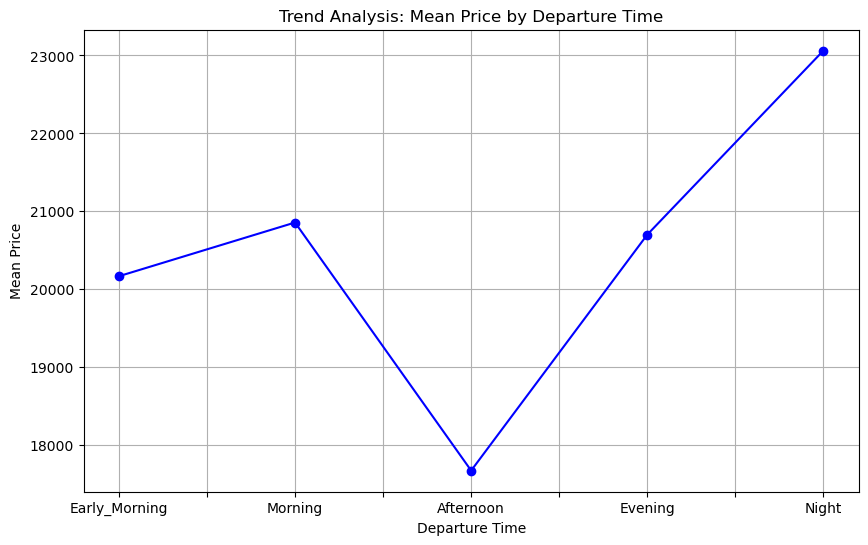

In [9]:
# Line chart for price trend
plt.figure(figsize=(10, 6))
trend_data.plot(kind='line', marker='o', color='b')
plt.title('Trend Analysis: Mean Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

### Categorical Analysis

In [11]:
# Cross-tabulation of airline and general_stops
crosstab = pd.crosstab(df['airline'], df['general_stops'])

# Output the cross-tabulation
print("Cross-tabulation (Airline vs General Stops):")
print(crosstab)

Cross-tabulation (Airline vs General Stops):
general_stops                         one  two_or_more   zero
airline                                                      
AirAsia                             11533         2254   2613
AirIndia                            71475         4206   6954
GO_FIRST                            19545          405   3223
GoAir                                  92            0    100
IndiGo                              31865          756  12552
Jet Airways                          2277          607    922
Multiple carriers                    1009           46    121
Multiple carriers Premium economy      13            0      1
SpiceJet                             6674            0   3145
Trujet                                  1            0      0
Unkown Airline                        558          163    448
Vistara                            111381         6418  10544
Vistara Premium economy                 0            0      3


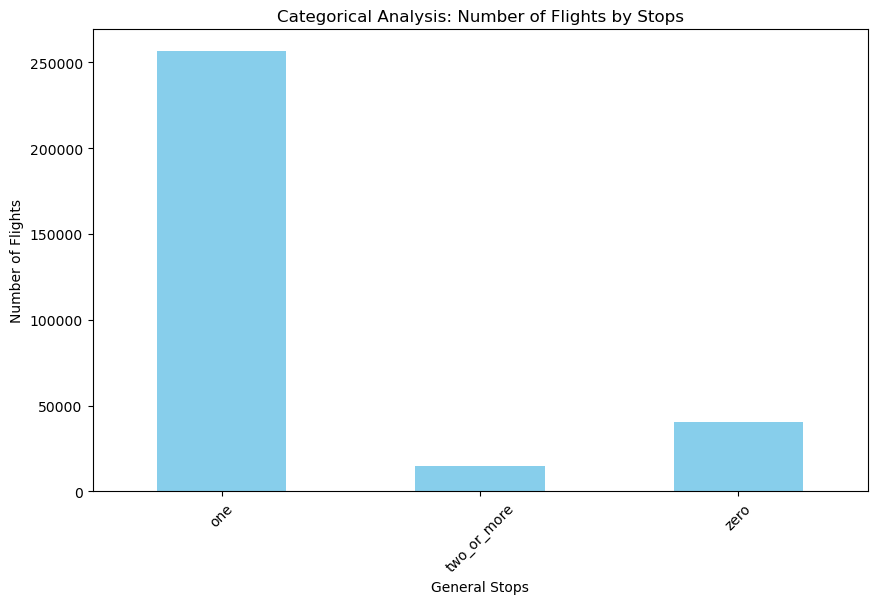

In [12]:
# Bar chart for a specific categorical analysis (e.g., count of airlines by general stops)
crosstab.sum(axis=0).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Categorical Analysis: Number of Flights by Stops')
plt.xlabel('General Stops')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()